In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Air Quality Prediction/Train.csv")

In [5]:
X = df.values

In [6]:
X_train = X[:,:-1]

In [7]:
Y_train = X[:,-1]

In [8]:
mu = X_train.mean(axis = 0)

In [9]:
sigma = X_train.std(axis = 0)

In [10]:
X_train = (X_train - mu)/sigma

In [11]:
m,n = X.shape

In [12]:
ones = np.ones((m,1))

In [13]:
X_train = np.hstack((ones,X_train))

In [14]:
df_test = pd.read_csv("Air Quality Prediction/Test.csv") 

In [15]:
X_test = df_test.values

In [16]:
mu = X_test.mean(axis=0)
sigma = X_test.std(axis=0)

In [17]:
X_test = (X_test-mu)/sigma

In [18]:
def hypothesis(x,theta):
    #or we can do X.dot(theta)
    return np.dot(x,theta)

In [19]:
def error(hx , Y):
    m = hx.shape
    return np.sum((hx - Y)**2)/m

In [20]:
def gradient(X,hx,Y):
    m = hx.shape
    return np.dot(X.T,(hx-Y))/m

In [21]:
def gradient_descent(X,Y,max_iter = 100000,lr = 0.001):
    m,n = X.shape
    theta = np.zeros((n,))
    err_list = []
    for i in range(max_iter):
        hx = hypothesis(X,theta)
        e = error(hx,Y)
        err_list.append(e)
        grad = gradient(X,hx,Y)
        
        theta = theta  - lr*grad
    return theta,err_list    
        

In [22]:
theta,err_list = gradient_descent(X_train ,Y_train)

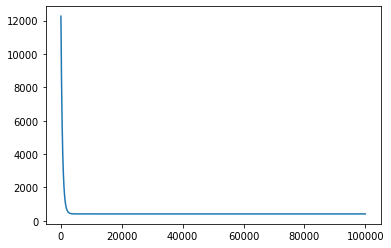

In [23]:
plt.plot(err_list)

In [24]:
err_list

[array([12256.13041403]),
 array([12232.67498761]),
 array([12209.26615952]),
 array([12185.90383692]),
 array([12162.58792715]),
 array([12139.31833774]),
 array([12116.0949764]),
 array([12092.91775102]),
 array([12069.78656968]),
 array([12046.70134066]),
 array([12023.66197239]),
 array([12000.6683735]),
 array([11977.72045281]),
 array([11954.81811932]),
 array([11931.96128219]),
 array([11909.14985078]),
 array([11886.38373465]),
 array([11863.66284349]),
 array([11840.98708723]),
 array([11818.35637592]),
 array([11795.77061985]),
 array([11773.22972943]),
 array([11750.7336153]),
 array([11728.28218825]),
 array([11705.87535925]),
 array([11683.51303946]),
 array([11661.1951402]),
 array([11638.92157299]),
 array([11616.69224951]),
 array([11594.50708162]),
 array([11572.36598135]),
 array([11550.26886092]),
 array([11528.21563271]),
 array([11506.2062093]),
 array([11484.24050341]),
 array([11462.31842796]),
 array([11440.43989603]),
 array([11418.60482089]),
 array([11396.813

In [27]:
m1,n1 = X_test.shape

In [28]:
ones_test = np.ones((m1,1))

In [29]:
X_test = np.hstack((ones_test,X_test))

In [30]:
hx = hypothesis(X_test,theta)

In [70]:
res =np.hstack((ids.reshape(-1,1), hx.reshape(-1,1))) # need to reshape if it is in vector 
#the given ids and hx are in vector and hence they need to be reshape 
# if not reshaped then it will not hstack instead it will vstack
# so rshape it

In [97]:
pd.DataFrame(res,columns = ['Id','Target']).to_csv("Air Quality Prediction/Target.csv",index = False)